In [1]:
cd /home

/home


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import glob
import os

from tensorflow.keras.losses import CategoricalCrossentropy
from presentation.pipelines.steps.model_design import load_pt_model, build_classifier 
from presentation.pipelines.steps.load_data import build_loader 

pd.options.mode.chained_assignment = None  # default='warn'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

2024-07-02 19:34:14.920627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
root = './presentation/results/maogat/2024-06-02_04-18-39/'

In [4]:
n_classes = {'alcock': 6, 'atlas': 5}

In [65]:
results = {'alcock': {}, 'atlas':{}}
for ds_name in ['alcock', 'atlas']:
    for spc in [20, 100]:
        fold_gammas = []
        for fold_n in range(3):
        
            ft_case = '{}/fold_{}/{}_{}'.format(ds_name, fold_n, ds_name, spc)
            curr = os.path.join(root, 'classification', ft_case, 'skip_avg_mlp')

            astromer, model_config = load_pt_model(os.path.join(root, 'finetuning', ft_case))

            model = build_classifier(astromer, 
                                    model_config, 
                                    False, 
                                    n_classes[ds_name],
                                    arch='skip_avg_mlp')

            model.load_weights(os.path.join(curr, 'weights'))
            gamma_values = model.get_layer('gamma_weight').gamma.numpy()
            fold_gammas.append(gamma_values)

        results[ds_name][spc] =  fold_gammas
        
    

[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:51,504 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:51,505 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:51,506 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:51,507 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:51,508 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:51,509 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:51,510 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:51,511 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:51,512 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:51,513 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:51,514 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:51,515 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:51,515 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:51,516 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:51,517 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:51,518 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:51,519 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:51,520 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:51,521 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:51,522 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:51,523 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:51,524 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:51,525 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:51,525 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:51,526 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:52,220 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:52,221 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:52,222 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:52,223 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:52,224 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:52,225 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:52,226 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:52,227 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:52,228 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:52,228 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:52,229 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:52,230 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:52,231 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:52,232 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:52,233 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:52,234 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:52,235 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:52,236 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:52,236 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:52,237 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:52,238 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:52,239 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:52,240 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:52,241 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:52,242 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:52,934 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:52,935 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:52,936 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:52,937 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:52,938 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:52,939 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:52,940 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:52,941 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:52,942 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:52,942 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:52,943 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:52,944 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:52,945 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:52,946 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:52,947 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:52,948 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:52,949 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:52,950 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:52,951 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:52,951 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:52,952 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:52,953 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:52,954 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:52,955 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:52,956 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:53,649 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:53,650 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:53,651 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:53,652 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:53,653 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:53,654 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:53,655 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:53,656 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:53,657 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:53,657 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:53,658 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:53,659 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:53,660 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:53,661 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:53,662 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:53,663 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:53,664 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:53,665 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:53,665 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:53,666 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:53,667 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:53,668 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:53,669 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:53,670 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:53,671 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:54,364 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:54,365 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:54,366 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:54,367 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:54,368 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:54,369 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:54,370 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:54,370 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:54,371 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:54,372 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:54,373 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:54,374 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:54,375 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:54,376 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:54,377 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:54,378 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:54,379 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:54,379 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:54,380 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:54,381 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:54,382 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:54,383 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:54,384 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:54,385 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:54,386 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:55,082 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:55,083 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:55,084 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:55,085 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:55,086 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:55,087 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:55,088 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:55,089 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:55,089 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:55,090 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:55,091 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:55,092 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:55,093 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:55,094 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:55,095 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:55,096 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:55,096 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:55,097 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:55,098 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:55,099 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:55,100 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:55,101 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:55,102 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:55,103 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:55,103 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:55,806 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:55,807 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:55,808 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:55,809 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:55,810 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:55,811 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:55,811 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:55,812 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:55,813 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:55,814 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:55,815 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:55,816 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:55,817 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:55,818 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:55,819 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:55,820 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:55,820 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:55,821 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:55,822 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:55,823 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:55,824 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:55,825 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:55,826 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:55,827 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:55,828 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:56,549 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:56,550 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:56,551 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:56,552 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:56,553 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:56,554 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:56,554 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:56,555 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:56,556 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:56,557 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:56,558 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:56,559 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:56,560 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:56,561 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:56,562 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:56,562 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:56,563 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:56,564 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:56,565 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:56,566 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:56,567 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:56,568 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:56,569 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:56,570 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:56,570 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:57,280 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:57,282 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:57,283 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:57,284 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:57,284 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:57,285 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:57,286 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:57,287 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:57,288 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:57,289 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:57,290 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:57,291 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:57,292 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:57,293 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:57,293 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:57,294 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:57,295 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:57,296 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:57,297 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:57,298 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:57,299 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:57,300 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:57,301 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:57,301 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:57,302 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:58,013 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:58,014 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:58,015 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:58,016 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:58,017 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:58,018 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:58,019 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:58,020 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:58,021 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:58,022 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:58,023 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:58,023 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:58,024 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:58,025 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:58,026 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:58,027 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:58,028 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:58,029 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:58,030 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:58,031 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:58,032 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:58,032 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:58,033 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:58,034 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:58,035 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:58,731 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:58,733 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:58,733 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:58,734 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:58,735 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:58,736 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:58,737 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:58,738 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:58,739 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:58,740 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:58,741 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:58,742 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:58,743 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:58,743 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:58,744 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:58,745 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:58,746 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:58,747 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:58,748 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:58,749 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:58,750 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:58,751 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:58,751 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:58,752 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:58,753 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Temperature: 0.50
[INFO] Masking Keys tokens only
[INFO] Using skip_avg_mlp clf architecture with base


2024-07-02 19:47:59,471 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-07-02 19:47:59,472 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-07-02 19:47:59,473 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-07-02 19:47:59,474 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-07-02 19:47:59,475 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-07-02 19:47:59,476 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-07-02 19:47:59,477 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-07-02 19:47:59,478 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-07-02 19:47:59,478 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-07-02 19:47:59,479 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-07-02 19:47:59,480 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-07-02 19:47:59,481 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-07-02 19:47:59,482 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-07-02 19:47:59,483 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-07-02 19:47:59,484 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-07-02 19:47:59,485 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-07-02 19:47:59,486 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-07-02 19:47:59,486 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-07-02 19:47:59,487 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-07-02 19:47:59,488 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-07-02 19:47:59,489 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-07-02 19:47:59,490 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-07-02 19:47:59,491 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-07-02 19:47:59,492 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-07-02 19:47:59,493 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


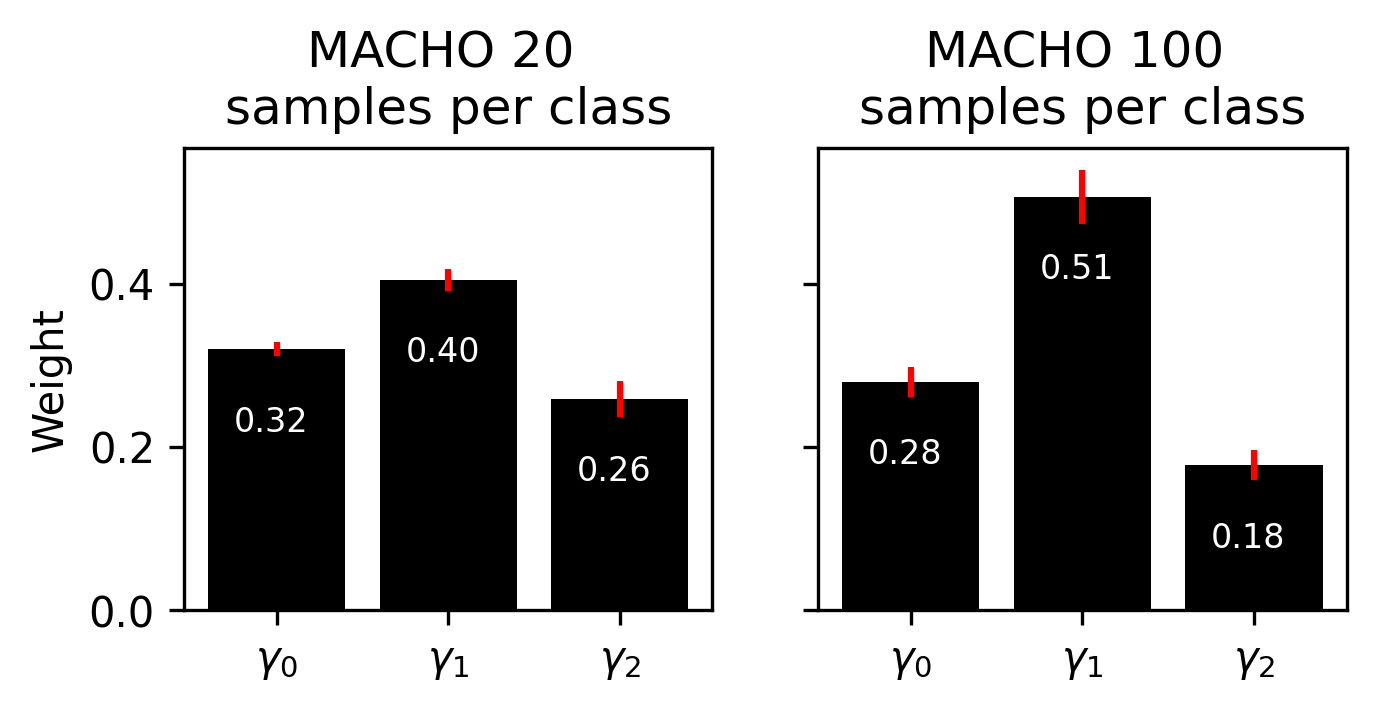

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2), dpi=300, sharey=True)
x = [r'$\gamma_0$', r'$\gamma_1$', r'$\gamma_2$']

for i, spc in enumerate([20, 100]):
    mean_values = np.mean(results['alcock'][spc], 0)
    std_values = np.std(results['alcock'][spc], 0)
    axes[i].bar(range(len(x)),mean_values, yerr=std_values, color='k', error_kw=dict(ecolor='red'))
    axes[i].set_xticks(range(len(x)))
    axes[i].set_xticklabels(x)
    
    for k, v in enumerate(mean_values):
        axes[i].text(k-0.25, v-0.1, '{:.2f}'.format(v), fontsize=8, color='white')
        
    axes[i].set_title('MACHO {} \nsamples per class'.format(spc))
axes[0].set_ylabel('Weight')
plt.show()

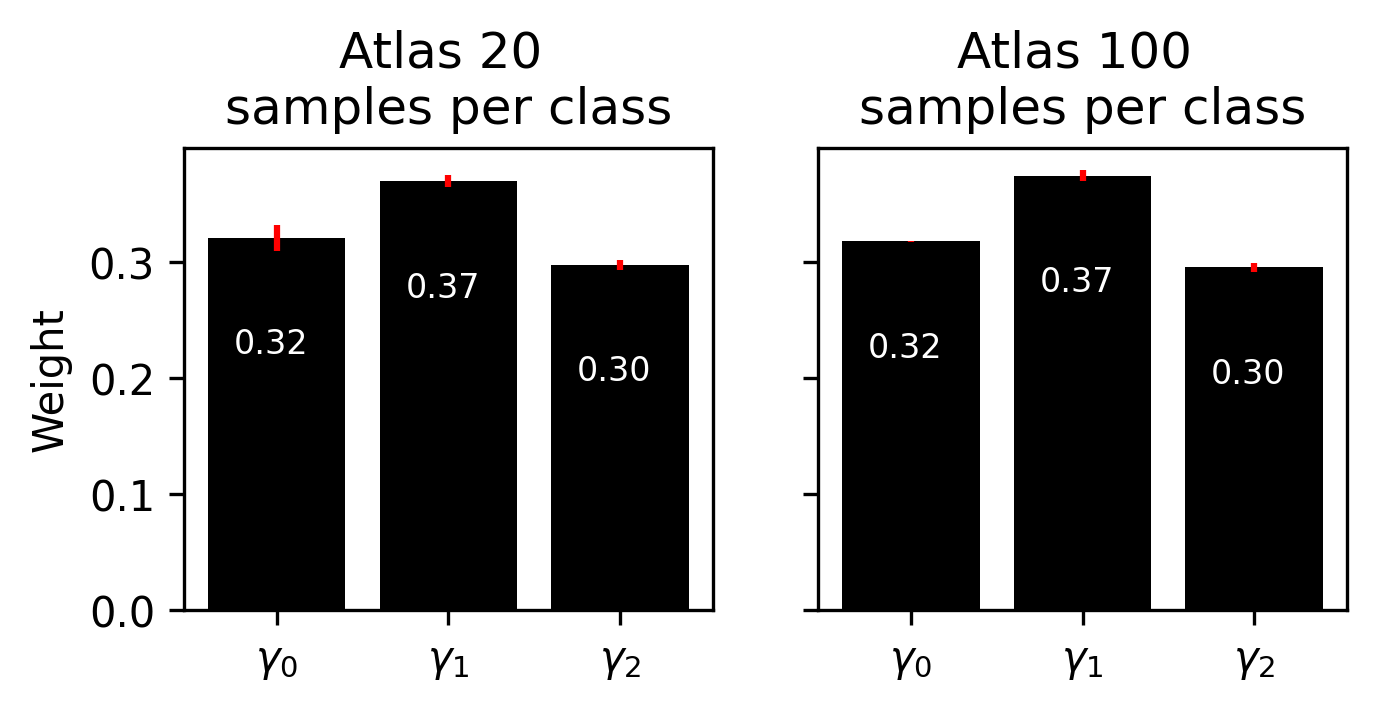

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2), dpi=300, sharey=True)
x = [r'$\gamma_0$', r'$\gamma_1$', r'$\gamma_2$']

for i, spc in enumerate([20, 100]):
    mean_values = np.mean(results['atlas'][spc], 0)
    std_values = np.std(results['atlas'][spc], 0)
    axes[i].bar(range(len(x)),mean_values, yerr=std_values, color='k', error_kw=dict(ecolor='red'))
    axes[i].set_xticks(range(len(x)))
    axes[i].set_xticklabels(x)
    
    for k, v in enumerate(mean_values):
        axes[i].text(k-0.25, v-0.1, '{:.2f}'.format(v), fontsize=8, color='white')
        
    axes[i].set_title('Atlas {} \nsamples per class'.format(spc))
axes[0].set_ylabel('Weight')
plt.show()